## 1. Plot the observations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from seaborn import set_style

set_style("whitegrid")

In [2]:
# Select AAP data to do the time series prediction
#Apple data for last 5 years

data_aap = pd.read_csv("data/individual_stocks_5yr/individual_stocks_5yr/AAP_data.csv",
                        parse_dates=['date'])
data_aap.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,78.34,79.72,78.0100,78.90,1298137,AAP
1,2013-02-11,78.65,78.91,77.2300,78.39,758016,AAP
2,2013-02-12,78.39,78.63,77.5132,78.60,876859,AAP
3,2013-02-13,78.90,79.13,77.8500,78.97,1038574,AAP
4,2013-02-14,78.66,79.72,78.5850,78.84,1005376,AAP


In [3]:
# Get the number of rows and columns
rows, cols = data_aap.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {cols}")

Number of rows: 1259
Number of columns: 7


In [4]:
# Split the data into train and test data by index slicing
# The test data is the last 120 indices
data_aap_test = data_aap.iloc[-120:].copy()
data_aap_train = data_aap.drop(data_aap_test.index).copy()

From this plot, we see an upward trend for the closing stock price. 

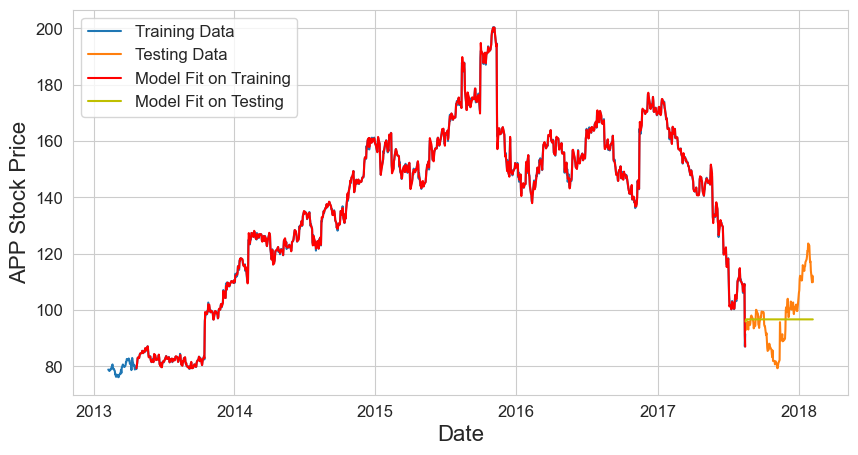

In [10]:
W= 3# this is the size of the data in each window
for i in range(W):
    data_aap_train[f'close_-{i}'] = data_aap_train['close'].shift(i)
A = data_aap_train.transpose()

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
L1 = len(data_aap_train.close)
L2 = len(data_aap_test.close)

Predictions = []
#Predictions will take in data points [i, i + 50), perform a linear regression giving a line f_i, and it will be f_i(50) 
for i in range(W-1):
    Predictions.append(0)

for i in range(W-1, L1):
    X_1 = np.arange(i,W+i).reshape(-1, 1)
    y_1 = A[i][7:7 + W]
    reg.fit(X_1, y_1)
    Predictions.append( reg.predict([[i]])[0]  )
    
for i in range(L2): #we will produce 120 new predictions
    A[1138][7:7+W] = A[1138][7:7+W].shift(1) #this shifts last W data points by 1 
    A[1138][7:7+W]['close_-0'] =  reg.predict([[L1]])[0] #we replace last point with prediction from last line 
    X_1 = np.arange(L1,L1+W).reshape(-1, 1)
    reg.fit(X_1, A[1138][7:7+W] ) #new line
    Predictions.append(reg.predict([[L1]])[0] ) #this new point is added to the prediction set

plt.figure(figsize=(10,5))

plt.plot( data_aap_train.date[0:],
            data_aap_train.close[0:],
            label="Training Data")

plt.plot( data_aap_test.date[0:],
            data_aap_test.close[0:],
            label="Testing Data")

plt.plot(data_aap_train.date[49:],
            Predictions[49:L1],
            "r",
            label="Model Fit on Training")

plt.plot(data_aap_test.date[0:],
            Predictions[L1:L1+L2],
            "y",
            label="Model Fit on Testing")

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

plt.xlabel("Date", fontsize=16)
plt.ylabel("APP Stock Price", fontsize=16)

plt.show()


In [11]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(data_aap_test.close[0: ],Predictions[L1:L1+L2]))

119.0560091156684
